In [61]:
import pandas as pd
df = pd.read_csv('Churn.csv')

In [62]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0,1,1,1,10134888,1
1,15647311,608,Spain,Female,41,1,8380786,1,0,1,11254258,0
2,15619304,502,France,Female,42,8,1596608,3,1,0,11393157,1
3,15701354,699,France,Female,39,1,0,2,0,0,9382663,0
4,15737888,850,Spain,Female,43,2,12551082,1,1,1,790841,0


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customer_id       1000 non-null   int64 
 1   credit_score      1000 non-null   int64 
 2   country           1000 non-null   object
 3   gender            1000 non-null   object
 4   age               1000 non-null   int64 
 5   tenure            1000 non-null   int64 
 6   balance           1000 non-null   int64 
 7   products_number   1000 non-null   int64 
 8   credit_card       1000 non-null   int64 
 9   active_member     1000 non-null   int64 
 10  estimated_salary  1000 non-null   int64 
 11  churn             1000 non-null   int64 
dtypes: int64(10), object(2)
memory usage: 93.9+ KB


In [64]:
df.country.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [65]:
df = df.drop(columns={'customer_id'})
df.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0,1,1,1,10134888,1
1,608,Spain,Female,41,1,8380786,1,0,1,11254258,0
2,502,France,Female,42,8,1596608,3,1,0,11393157,1
3,699,France,Female,39,1,0,2,0,0,9382663,0
4,850,Spain,Female,43,2,12551082,1,1,1,790841,0


In [66]:
import warnings
warnings.filterwarnings('ignore')
df.gender.replace({'Female': 0, 'Male': 1}, inplace=True)
df.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,0,42,2,0,1,1,1,10134888,1
1,608,Spain,0,41,1,8380786,1,0,1,11254258,0
2,502,France,0,42,8,1596608,3,1,0,11393157,1
3,699,France,0,39,1,0,2,0,0,9382663,0
4,850,Spain,0,43,2,12551082,1,1,1,790841,0


In [67]:
df = pd.get_dummies(df, columns=['country'])

In [68]:
df.head()

,credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_France,country_Germany,country_Spain
0,619,0,42,2,0,1,1,1,10134888,1,True,False,False
1,608,0,41,1,8380786,1,0,1,11254258,0,False,False,True
2,502,0,42,8,1596608,3,1,0,11393157,1,True,False,False
3,699,0,39,1,0,2,0,0,9382663,0,True,False,False
4,850,0,43,2,12551082,1,1,1,790841,0,False,False,True


In [101]:
df.columns

Index(['credit_score', 'gender', 'age', 'tenure', 'balance', 'products_number',
       'credit_card', 'active_member', 'estimated_salary', 'churn',
       'country_France', 'country_Germany', 'country_Spain'],
      dtype='object')

In [107]:
cols = ['credit_score', 'gender', 'age', 'tenure', 'balance', 'products_number',
       'credit_card', 'active_member', 'estimated_salary', 'churn']

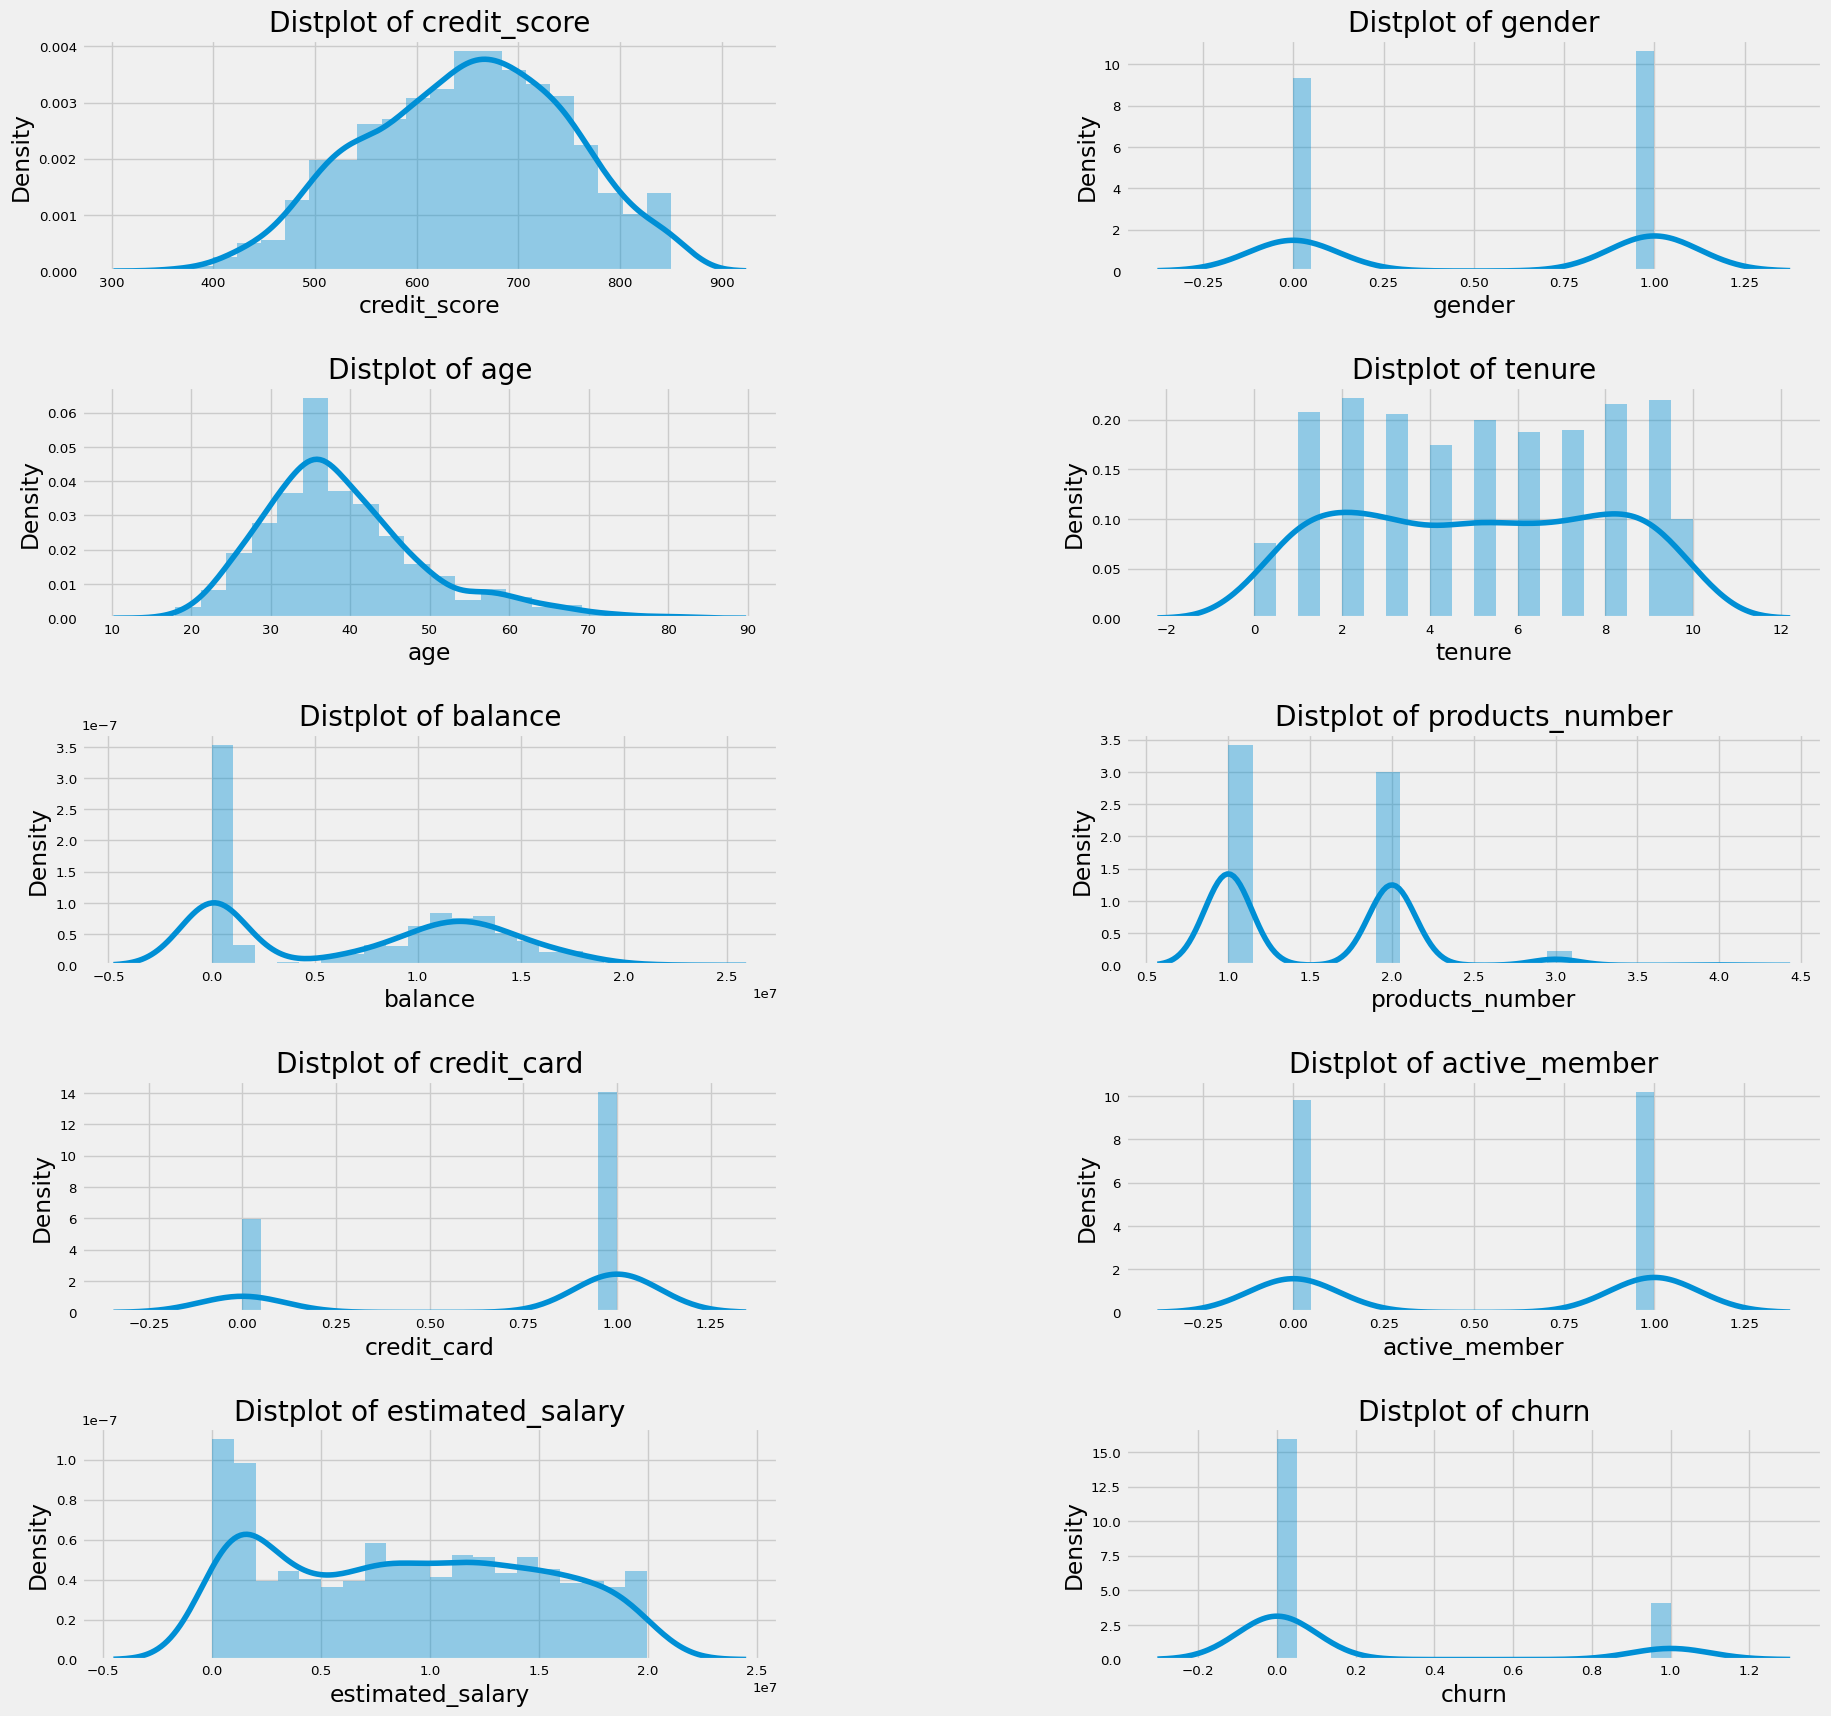

In [108]:
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
plt.figure(1, figsize = (20, 20))
n = 0
for x in cols:
    n += 1
    plt.subplot(5, 2, n)
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
    sns.distplot(df[x], bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()

In [97]:
df.credit_card.value_counts()

credit_card
1    703
0    297
Name: count, dtype: int64

## EDA

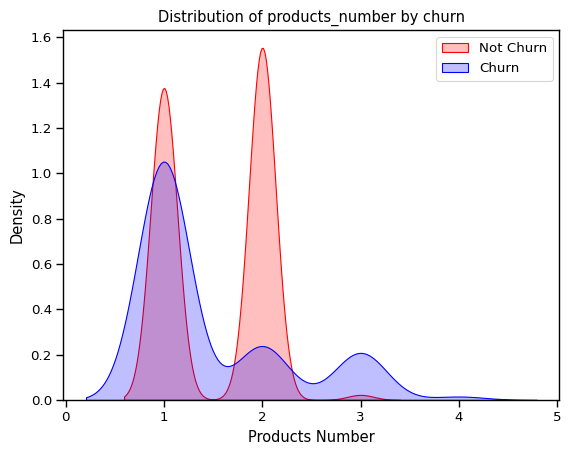

In [70]:
# products_number
import seaborn as sns

sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(df.products_number[(df.churn == 0) ], color="Red", shade = True);
ax = sns.kdeplot(df.products_number[(df.churn == 1) ], color="Blue", shade= True);
ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Products Number');
ax.set_title('Distribution of products_number by churn');

- Những khách hàng có products_number = 2 thì tỉ lệ rời bỏ cực kì thấp, cao gấp 8 lần lượng khách hàng rời bỏ
- Đối với những khách hàng có products_number = 1 thì tỉ lệ rời bỏ cực kì cao, gần bằng lượng khách hàng không rời bỏ
- Với khách hàng có product_numbers = 3 thì tỉ lệ khách hàng rời bỏ tương đối thấp, khoảng 0.2 những cao gấp nhiều lần lượng khách hàng không rời bỏ.

In [71]:
df.active_member.unique()

array([1, 0], dtype=int64)

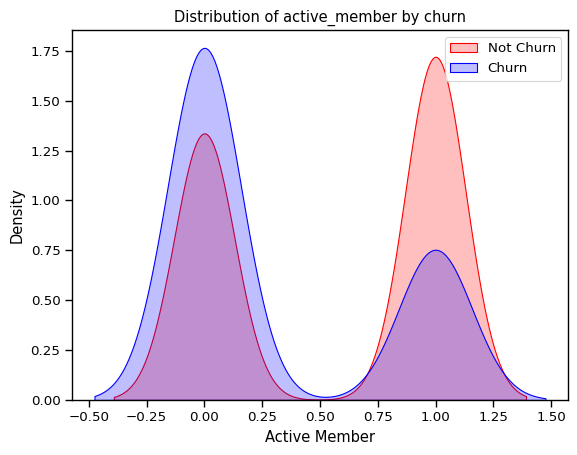

In [72]:
# active_member

sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(df.active_member[(df.churn == 0) ], color="Red", shade = True);
ax = sns.kdeplot(df.active_member[(df.churn == 1) ], color="Blue", shade= True);
ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Active Member');
ax.set_title('Distribution of active_member by churn');

- Những khách hàng là Member (active_member = 1) thì khả năng rất cao sẽ không rời bỏ, tỉ lệ rời bỏ của nhóm khách hàng này rất thấp, chỉ bằng 1/2 tỉ lệ khách hàng không rời bỏ
- Những khách hàng không phải Member (active_member = 0) thì có tỉ lệ rời bỏ rất cao, cao hơn hẳn tỉ lệ khách hàng không rời bỏ.

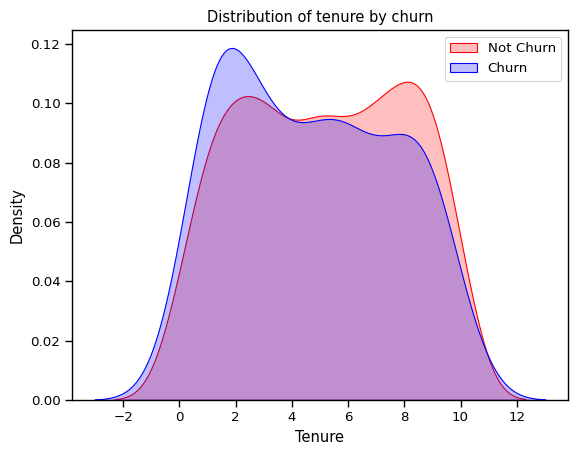

In [73]:
# tenure
import seaborn as sns

sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(df.tenure[(df.churn == 0) ], color="Red", shade = True);
ax = sns.kdeplot(df.tenure[(df.churn == 1) ], color="Blue", shade= True);
ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Tenure');
ax.set_title('Distribution of tenure by churn');

- Những khách hàng mới sử dụng ngân hàng thì có tỉ lệ rời bỏ cao hơn
- Đối với những khách hàng đã sử dụng ngân hàng từ lâu thì khả năng khách hàng rời bỏ sẽ thấp hơn.

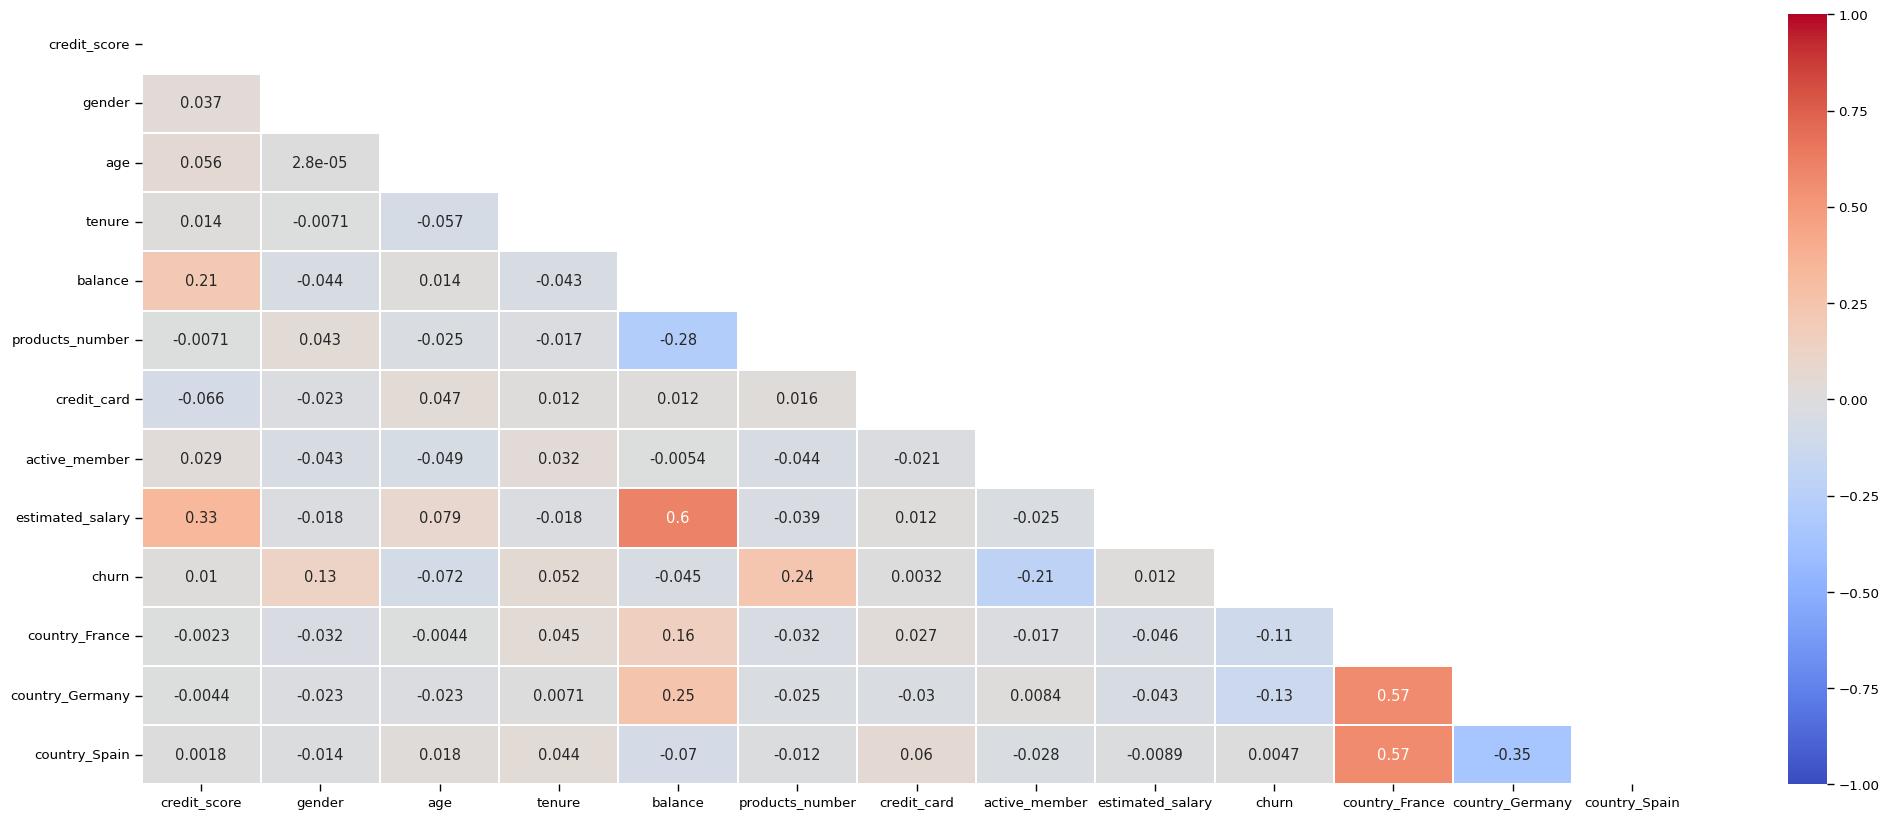

In [74]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(25, 10))

corr = df.apply(lambda x: pd.factorize(x)[0]).corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)

- Đa phần các thuộc tính không có sự liên quan tới nhau. Chỉ có balance phụ thuộc tương đối nhiều vào estimated_salary.

In [75]:
df.columns

Index(['credit_score', 'gender', 'age', 'tenure', 'balance', 'products_number',
       'credit_card', 'active_member', 'estimated_salary', 'churn',
       'country_France', 'country_Germany', 'country_Spain'],
      dtype='object')

In [76]:
df.age.unique()

array([42, 41, 39, 43, 44, 50, 29, 27, 31, 24, 34, 25, 35, 45, 58, 32, 38,
       46, 36, 33, 40, 51, 61, 49, 37, 19, 66, 56, 26, 21, 55, 75, 22, 30,
       28, 65, 48, 52, 57, 73, 47, 54, 72, 20, 67, 79, 62, 53, 80, 59, 68,
       23, 60, 70, 63, 64, 18, 82, 69, 74], dtype=int64)

In [77]:
df1=df.copy()

In [78]:
bins = [10, 20, 30, 40, 50, 60, 70, 80, 90]
labels = ['10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90']
df1.age = pd.cut(df1['age'], bins=bins, labels=labels, right=False)

In [81]:
bins = [300, 400, 500, 600, 700, 800, 900]
labels = ['300-400', '400-500', '500-600', '600-700', '700-800', '800-900']
df1.credit_score = pd.cut(df1.credit_score, bins=bins, labels=labels, right=False)

In [82]:
df1.balance.min(), df1.balance.max()

(0, 21177431)

In [83]:
bins = [0, 4000000, 8000000, 12000000, 16000000, 20000000, 24000000]
labels = ['0-4m', '4m-8m', '8m-12m', '12m-16m', '16m-20m', '2m-24m']
df1.balance = pd.cut(df1.balance, bins=bins, labels=labels, right=False)

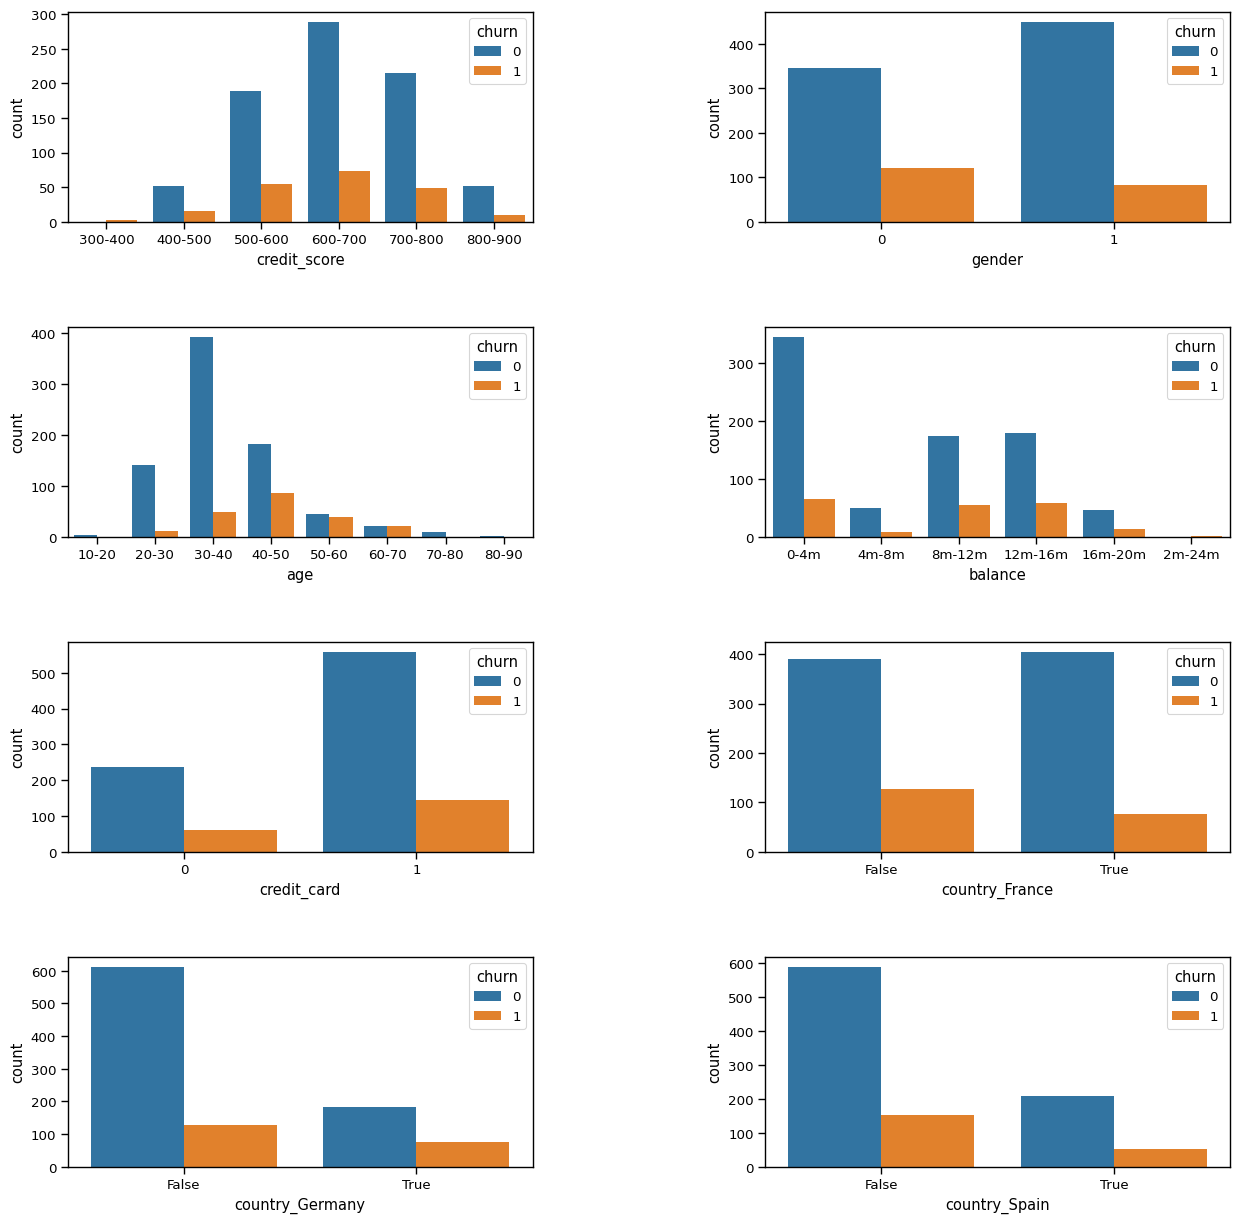

In [84]:
columns = ['credit_score', 'gender', 'age', 'balance', 'credit_card',
       'country_France', 'country_Germany', 'country_Spain']
plt.figure(1, figsize = (15, 15))
n = 0
for col in columns:
    n += 1
    plt.subplot(4, 2, n)
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
    sns.countplot(data=df1, x=col, hue='churn')
plt.show()

- Những khách hàng có độ tuổi từ 40-70, có tỉ lệ rời bỏ cực kì cao, gần với tỉ lệ không rời bỏ của khách hàng.
- Những khách hàng nữ có tỉ lệ rời bỏ cao hơn so với những khách hàng nam.
- Những khách hàng cư trú ở Germany có tỉ lệ rời bỏ khá cao, gần bằng 1/2 so với lượng khách hàng không rời bỏ.
- Những khách hàng có credit score thấp thì khả năng rất cao sẽ rời bỏ.

## Chia train, test

In [85]:
X = df.drop(columns=['churn'])
y = df.churn

In [86]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## Huấn luyện mô hình

In [87]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

In [88]:
models = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    GridSearchCV(RandomForestClassifier(), param_grid={
        'n_estimators': [10 ,50, 100, 200],
    }),
    GridSearchCV(KNeighborsClassifier(), param_grid={
        'n_neighbors': [10 ,50, 100, 200],
    }),
    GridSearchCV(AdaBoostClassifier(), param_grid={
        'n_estimators': [10 ,50, 100, 200],
    }),
    GridSearchCV(GradientBoostingClassifier(), param_grid={
        'n_estimators': [10 ,50, 100, 200],
    }),
    GridSearchCV(XGBClassifier(), param_grid={
        'n_estimators': [10 ,50, 100, 200],
    }),
]




In [89]:
for model in models:
    _model = model
    _model.fit(X_train, y_train)
    pred = _model.predict(X_test)
    print('='*50)
    print(_model)
    try:
        print(f"BEST PARAM: {_model.best_params_}")
    except:
        pass
    print(classification_report(y_test, pred))
    print('='*50)

LogisticRegression()
              precision    recall  f1-score   support

           0       0.78      0.94      0.85       156
           1       0.25      0.07      0.11        44

    accuracy                           0.75       200
   macro avg       0.52      0.51      0.48       200
weighted avg       0.66      0.75      0.69       200

DecisionTreeClassifier()
              precision    recall  f1-score   support

           0       0.85      0.81      0.83       156
           1       0.43      0.50      0.46        44

    accuracy                           0.74       200
   macro avg       0.64      0.66      0.65       200
weighted avg       0.76      0.74      0.75       200

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [10, 50, 100, 200]})
BEST PARAM: {'n_estimators': 50}
              precision    recall  f1-score   support

           0       0.84      0.99      0.91       156
           1       0.88      0.32      0.47    

### Nhận xét:
Dựa vào giá trị precision, recall trên lớp 0, 1 và accuracy.
=> Mô hình được sử dụng cho việc dự đoán những khách hàng có khả năng cao sẽ rời đi là AdaBoostClassifier

# OverSampling

In [90]:
X_train.shape

(800, 12)

In [91]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [92]:
y_train.value_counts()

churn
0    640
1    640
Name: count, dtype: int64

In [93]:
for model in models:
    _model = model
    _model.fit(X_train, y_train)
    pred = _model.predict(X_test)
    print('='*50)
    print(_model)
    try:
        print(f"BEST PARAM: {_model.best_params_}")
    except:
        pass
    print(classification_report(y_test, pred))
    print('='*50)

LogisticRegression()
              precision    recall  f1-score   support

           0       0.87      0.60      0.71       156
           1       0.33      0.68      0.44        44

    accuracy                           0.62       200
   macro avg       0.60      0.64      0.58       200
weighted avg       0.75      0.62      0.65       200

DecisionTreeClassifier()
              precision    recall  f1-score   support

           0       0.86      0.83      0.84       156
           1       0.46      0.52      0.49        44

    accuracy                           0.76       200
   macro avg       0.66      0.67      0.67       200
weighted avg       0.77      0.76      0.77       200

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [10, 50, 100, 200]})
BEST PARAM: {'n_estimators': 50}
              precision    recall  f1-score   support

           0       0.89      0.89      0.89       156
           1       0.61      0.61      0.61    

- Khi thực hiện UnderSampling bộ dữ liệu thì ta thấy các mô hình có sự cải thiện rõ rệt khi dự đoán trên lớp 1